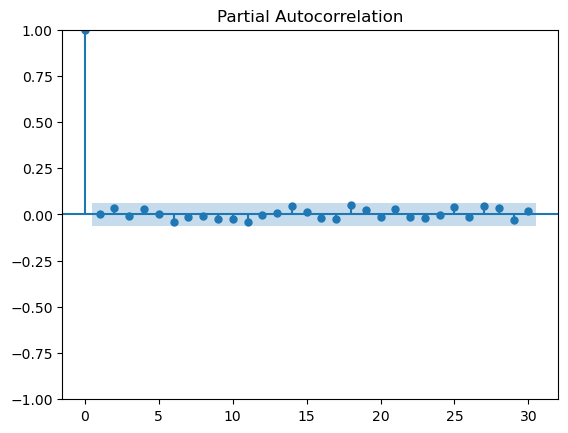

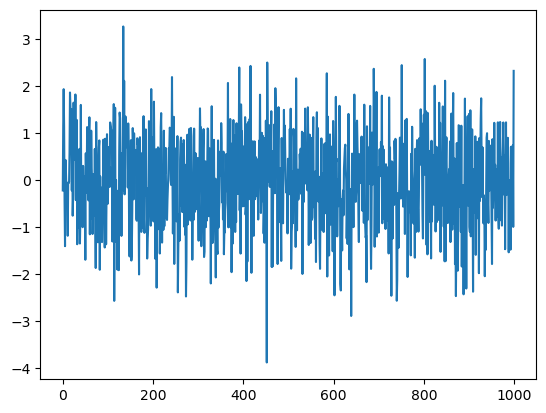

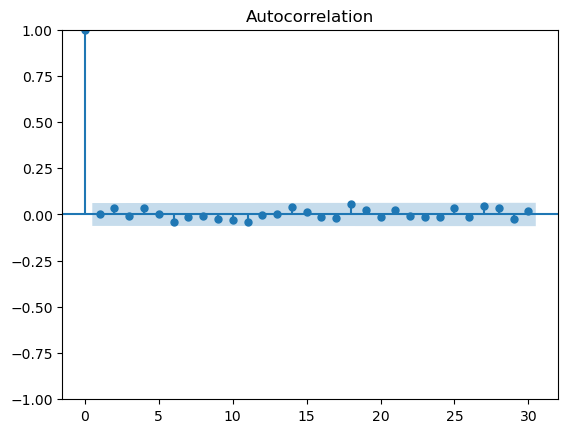

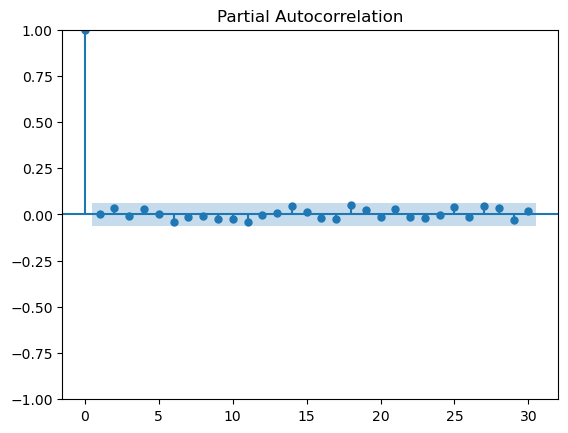

In [4]:
#bruit blanc gaussien
import numpy as np; 
import matplotlib.pyplot as plt;
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

e = np.random.normal(size=1000)
    
plt.plot(e)

plot_acf(e)
plot_pacf(e)

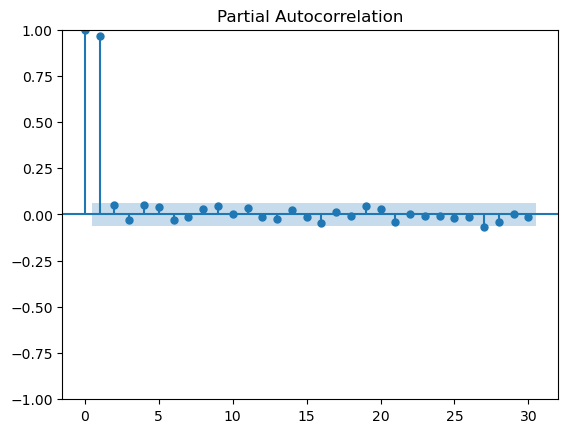

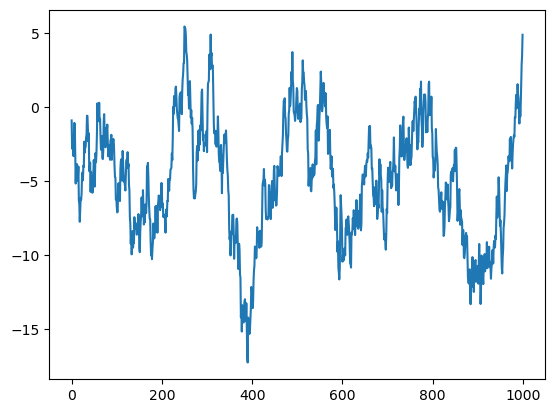

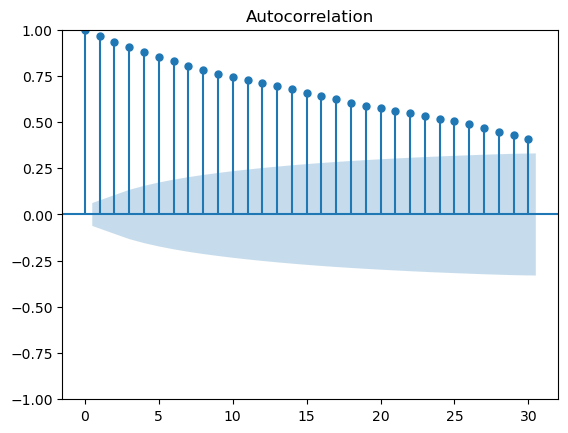

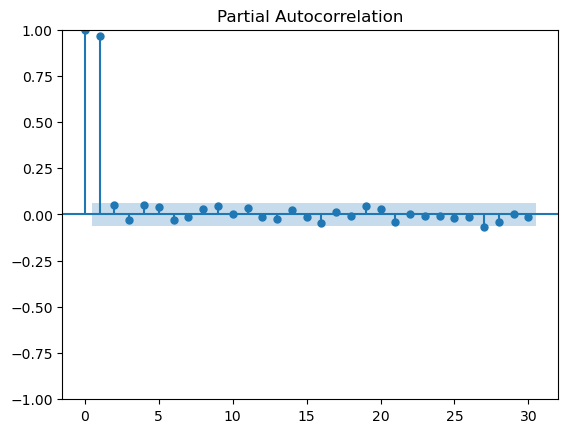

In [6]:
#Marche alatoire
T = 1000
e1 = np.random.normal(size=T)
x1 = np.zeros_like(e1)
for t in range(T):
    x1[t] = x1[t-1] + e1[t]
    
plt.plot(x1)
plot_acf(x1)
plot_pacf(x1)

In [32]:
# Modèle autorégressif
T = 1000
e1 = np.random.normal(size=T)
x1 = np.zeros_like(e1)
phi = 0.3
for t in range(T):
    x1[t] = phi * x1[t-1] + e1[t]

In [34]:
# Modèle moyenne mobile
T = 1000
e1 = np.random.normal(size=T)
x1 = np.zeros_like(e1)
theta1 = 0.8
theta2 = -1.4

for t in range(T):
    x1[t] = e1[t] + theta1 * e1[t-1] + theta2 * e1[t-2]

In [36]:
# Modèle autorégressif et moyenne mobile ARMA
T = 1000
e1 = np.random.normal(size=T)
x1 = np.zeros_like(e1)
phi1 = 0.3
phi2 = 0.6
theta1 = 0.8
theta2 = -1.1
theta3 = 0.5
for t in range(T):
    x1[t] = e1[t] + phi1 * x1[t-1] + phi2 * x1[t-2] + theta1 * e1[t-1] + theta2 * e1[t-2] + theta3 * e1[t-3]

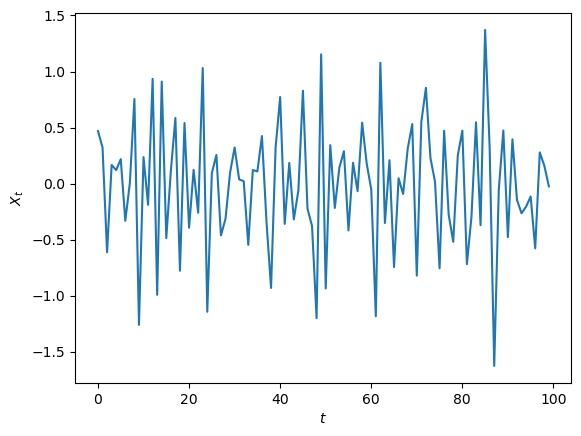

In [38]:
# L’utilisation de la fonction arma_generate_sample()
import statsmodels.tsa.api as smt

# Set coefficients 
ar_coefs = [1]
ma_coefs = [1, -0.7]
# Generate data
MA1 = smt.arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(MA1);
plt.ylabel('$X_t$');
plt.xlabel('$t$');

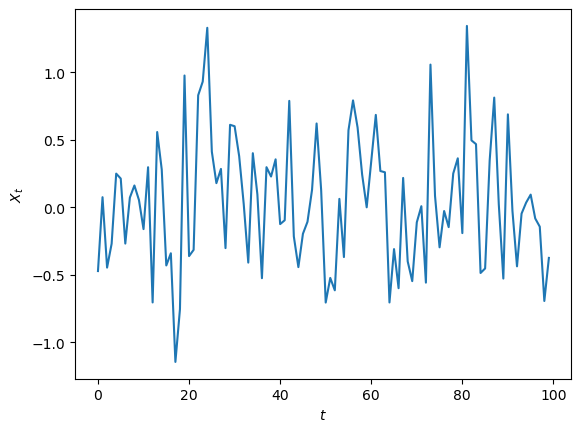

In [19]:

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]
# Generate data
AR2 = smt.arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)
plt.plot(AR2);
plt.ylabel('$X_t$');
plt.xlabel('$t$');

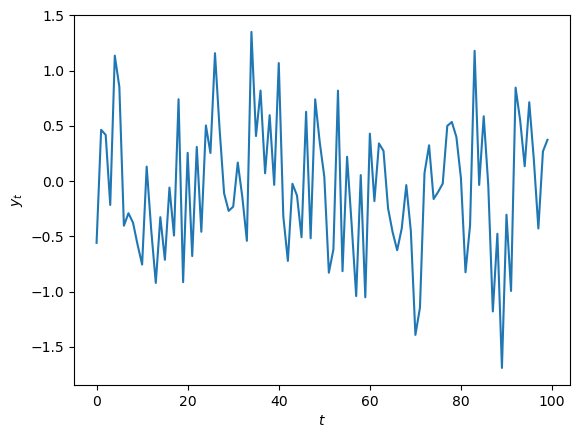

In [21]:
# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]
# Generate data
arma = smt.arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)
plt.plot(arma);
plt.ylabel('$y_t$');
plt.xlabel('$t$');

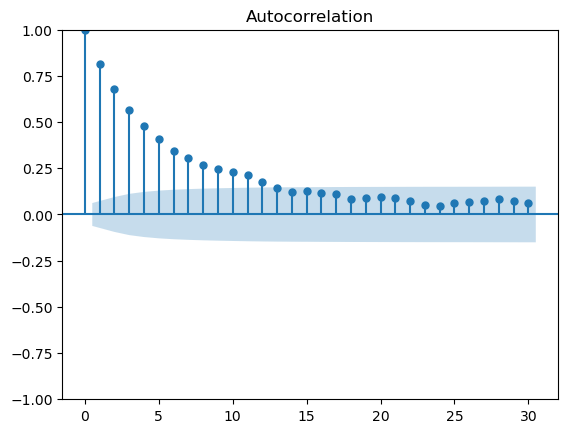

In [24]:
# Équivalence entre AR(1) et MA(∞)
# build a list MA parameters
ma = [0.8 ** i for i in range(30)]
# Simulate the MA(30) model
ar = np.array([1])
MA_inf = smt.arma_generate_sample(ar, ma, nsample=1000, scale=0.5)
# Plot the ACF
plot_acf(MA_inf, lags=30);

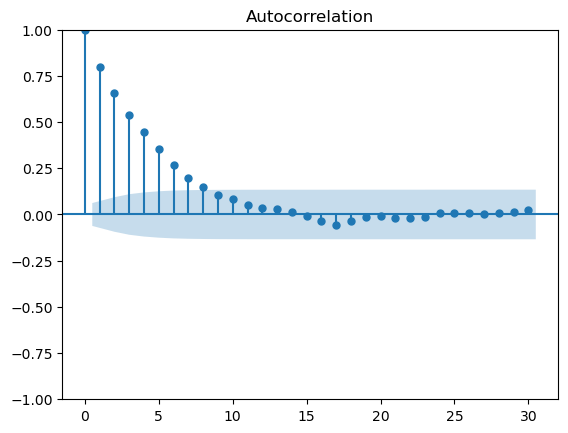

In [26]:
# Set coefficients
ar_coefs = [1, -0.8]
ma_coefs = [1]
# Generate data
AR1 = smt.arma_generate_sample(ar_coefs, ma_coefs, nsample=1000, scale=0.5)
# Plot the ACF
plot_acf(AR1, lags=30);

In [28]:
# Modélisation
m_AR1 = smt.ARIMA(AR1, order=(1,0,0)).fit()
print(m_AR1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -718.083
Date:                Sat, 08 Feb 2025   AIC                           1442.165
Time:                        01:34:46   BIC                           1456.888
Sample:                             0   HQIC                          1447.761
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1498      0.078      1.911      0.056      -0.004       0.303
ar.L1          0.7985      0.018     44.084      0.000       0.763       0.834
sigma2         0.2459      0.012     20.883      0.0

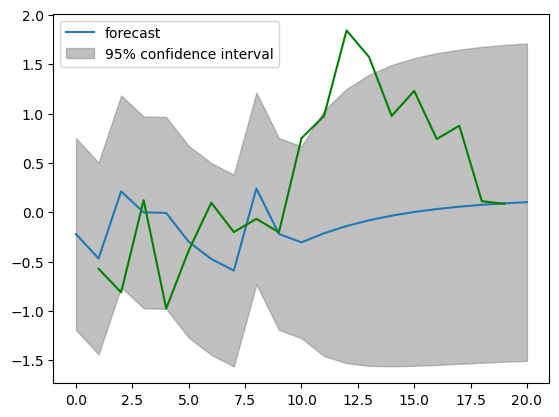

In [30]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(m_AR1,start=990, end=1010);
plt.plot(range(1, 20), AR1[1:20], color = "g")